In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import glob

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [4]:
data_type = "train"
# month = "07"
# category = "성과정보"

# local
root_path = '../data/open'

# colab
# root_path = '/content/drive/MyDrive/12조 파이널프로젝트/data'

drive_folder = f'{root_path}/{data_type}/8.성과정보/'

In [7]:
# 잔액정보 (모든 월 통합) 통합 parquet
performance_eda = pd.read_parquet(f'{drive_folder}train_성과정보_통합_전처리1.parquet')
performance_eda

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,Segment
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.000000,0.0,0.409766,...,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280542,D
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,...,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000,E
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.000000,0.0,-0.902166,...,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420,C
3,201807,TRAIN_000003,0.135707,0.135707,0.153976,-1.999996,0.0,0.000000,0.0,-0.866052,...,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124,D
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,0.761199,0.985175,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0.000000,0.000000,0.000000,0.000000,0.0,-0.081943,0.0,0.000027,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,0.761199,0.985175,E
2399996,201812,TRAIN_399996,0.073804,0.073804,0.073804,0.000000,0.0,0.000000,0.0,0.207099,...,0.999998,0.999998,0.999998,0.921733,-0.203251,-0.159143,0.000000,1.377071,2.533815,D
2399997,201812,TRAIN_399997,-0.040432,-0.040432,-0.040432,0.000000,0.0,0.000000,0.0,0.254494,...,0.345027,0.999998,0.999998,0.999998,0.027319,0.126581,0.000000,0.000000,0.000000,C
2399998,201812,TRAIN_399998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000034,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,0.761199,0.985175,E


In [3]:
performance_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 50 columns):
 #   Column              Dtype  
---  ------              -----  
 0   기준년월                int64  
 1   ID                  object 
 2   증감율_이용건수_신용_전월      float32
 3   증감율_이용건수_신판_전월      float32
 4   증감율_이용건수_일시불_전월     float32
 5   증감율_이용건수_할부_전월      float32
 6   증감율_이용건수_CA_전월      float32
 7   증감율_이용건수_체크_전월      float32
 8   증감율_이용건수_카드론_전월     float32
 9   증감율_이용금액_신용_전월      float32
 10  증감율_이용금액_신판_전월      float32
 11  증감율_이용금액_일시불_전월     float32
 12  증감율_이용금액_할부_전월      float32
 13  증감율_이용금액_CA_전월      float32
 14  증감율_이용금액_체크_전월      float32
 15  증감율_이용금액_카드론_전월     float32
 16  증감율_이용건수_신용_분기      float32
 17  증감율_이용건수_신판_분기      float32
 18  증감율_이용건수_일시불_분기     float32
 19  증감율_이용건수_할부_분기      float32
 20  증감율_이용건수_CA_분기      float32
 21  증감율_이용건수_체크_분기      float32
 22  증감율_이용건수_카드론_분기     float32
 23  증감율_이용금액_신용_분기      float32
 24  증감율_이용금액_신판_분기      floa

In [4]:
numeric_cols = performance_eda.select_dtypes(include='number').columns

In [5]:
# Segment 더미 변수화
segment_dummies = pd.get_dummies(performance_eda['Segment'], prefix='Segment').astype(int)

# 수치형 컬럼만 선택 (Segment 제외)
num_cols = performance_eda.select_dtypes(include='number').columns

# 더미 + 수치형 결합
data_for_corr = pd.concat([performance_eda[num_cols], segment_dummies], axis=1)

# 상관계수 계산
corr_matrix = data_for_corr.corr()

# Segment 더미와 수치형 변수들 간 상관계수 추출
segment_cols = segment_dummies.columns
segment_corr = corr_matrix[segment_cols].drop(index=segment_cols, errors='ignore')

# 절대값 기준으로 상위 10개 수치형 변수 추출
top_corr_by_segment = segment_corr.abs().sort_values(by=segment_cols.tolist(), ascending=False).head(10)

In [6]:
# 결과 출력
top_corr_by_segment

,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E
잔액_신판ca최대한도소진율_r6m,0.020396,0.014279,0.170705,0.194808,0.269216
잔액_신판ca최대한도소진율_r3m,0.019284,0.014731,0.168951,0.189801,0.263762
잔액_신판ca평균한도소진율_r3m,0.019208,0.014872,0.165630,0.186176,0.258695
잔액_신판ca평균한도소진율_r6m,0.018516,0.014438,0.160237,0.183721,0.253454
잔액_신판최대한도소진율_r6m,0.011962,0.008904,0.112035,0.165351,0.209717
증감율_이용건수_할부_전월,0.010671,0.006008,0.045674,0.064313,0.083100
잔액_신판최대한도소진율_r3m,0.009972,0.008869,0.108885,0.161623,0.204555
잔액_신판평균한도소진율_r6m,0.009054,0.008525,0.098833,0.154697,0.192739
잔액_신판평균한도소진율_r3m,0.008993,0.008921,0.104634,0.159379,0.200137
변동률_RVCA평잔,0.004709,0.001813,0.053962,0.092108,0.111917


C:\Users\win11\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


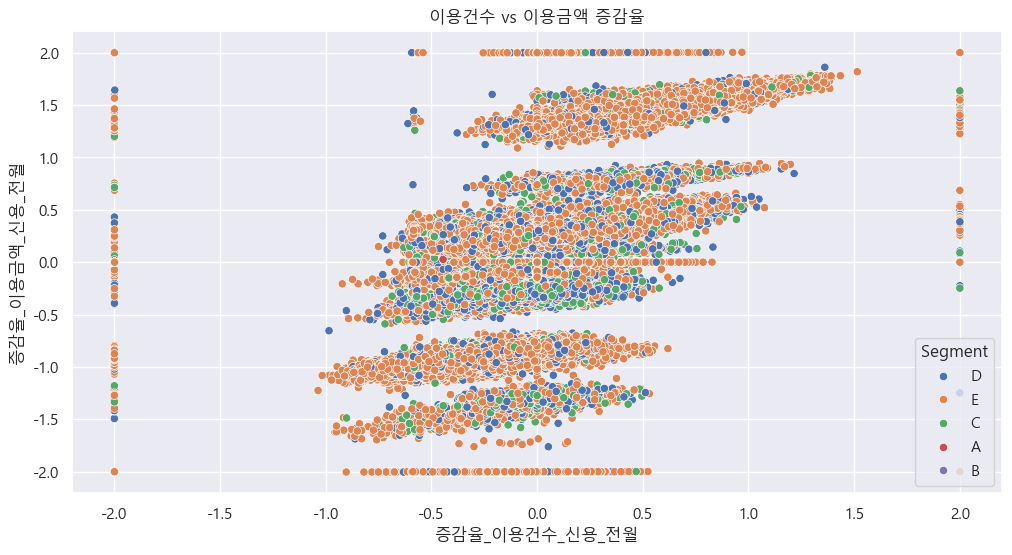

In [7]:
sns.scatterplot(
    data=performance_eda,
    x='증감율_이용건수_신용_전월',
    y='증감율_이용금액_신용_전월',
    hue='Segment'
)
plt.title("이용건수 vs 이용금액 증감율")
plt.show()

In [8]:
performance_eda['증감율_이용건수_신용_전월'].value_counts().sort_index()

증감율_이용건수_신용_전월
-1.999996    31020
-1.999996        1
-1.999996        1
-1.999995        1
-1.999995        1
             ...  
 1.999941        1
 1.999964        1
 1.999989        1
 1.999991        1
 1.999996    19311
Name: count, Length: 1495238, dtype: int64

In [9]:
performance_eda['증감율_이용건수_신용_전월'].value_counts().sort_index()
# performance_eda['증감율_이용건수_신판_전월'].value_counts().sort_index()
# performance_eda['증감율_이용건수_일시불_전월'].value_counts().sort_index()
# performance_eda['증감율_이용건수_할부_전월'].value_counts().sort_index()
# performance_eda['증감율_이용건수_CA_전월'].value_counts().sort_index()
# performance_eda['증감율_이용건수_카드론_전월'].value_counts().sort_index()

증감율_이용건수_신용_전월
-1.999996    31020
-1.999996        1
-1.999996        1
-1.999995        1
-1.999995        1
             ...  
 1.999941        1
 1.999964        1
 1.999989        1
 1.999991        1
 1.999996    19311
Name: count, Length: 1495238, dtype: int64

In [10]:
performance_eda['증감율_이용건수_카드론_전월'].value_counts().sort_index()

증감율_이용건수_카드론_전월
-1.999996       2761
 0.000000    2397239
Name: count, dtype: int64

- 증감율_이용건수_체크_전월 빼고는 뭔가 값이 다 이상하다.

In [12]:
performance_eda['증감율_이용건수_신용_분기'].value_counts().sort_index()
performance_eda['증감율_이용건수_신판_분기'].value_counts().sort_index()
performance_eda['증감율_이용건수_일시불_분기'].value_counts().sort_index()

증감율_이용건수_일시불_분기
-2.086276    1
-2.079006    1
-2.032640    1
-2.025602    1
-2.011970    1
            ..
 2.033424    1
 2.042763    1
 2.047863    1
 2.059918    1
 2.067569    1
Name: count, Length: 1660447, dtype: int64

In [13]:
performance_eda['증감율_이용건수_할부_분기'].value_counts().sort_index()
# performance_eda['증감율_이용건수_CA_분기'].value_counts().sort_index()
# performance_eda['증감율_이용건수_체크_분기'].value_counts().sort_index()
# performance_eda['증감율_이용건수_카드론_분기'].value_counts().sort_index()

증감율_이용건수_할부_분기
-1.999996    295128
-1.223831         1
-1.218097         1
-1.211261         1
-1.198811         1
              ...  
 1.316911         1
 1.318925         1
 1.323131         1
 1.323169         1
 1.999996    104891
Name: count, Length: 207117, dtype: int64

- 마찬가지로 증감율_이용건수_*_분기 에도 왜곡된 데이터가 있는 것 같다

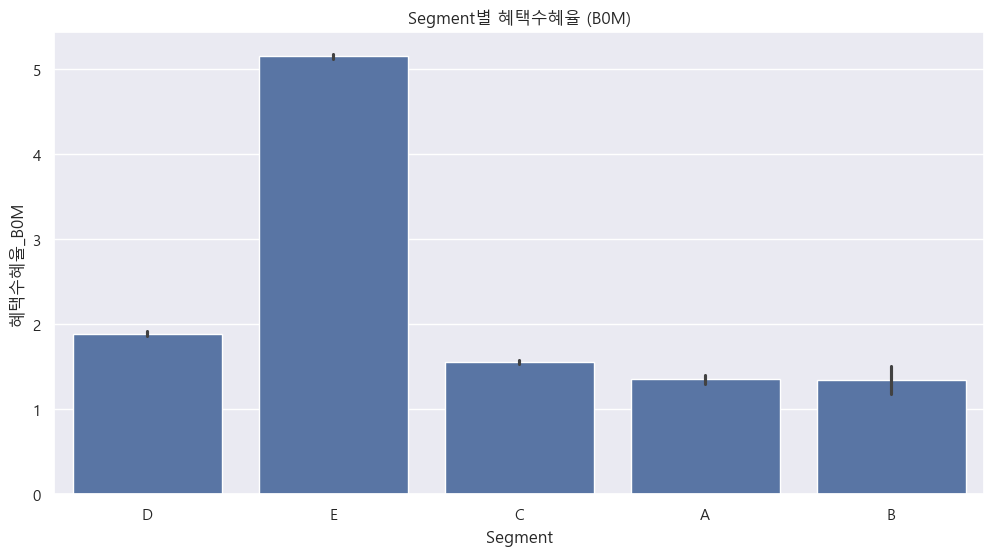

In [15]:
sns.barplot(data=performance_eda, x='Segment', y='혜택수혜율_B0M')
plt.title("Segment별 혜택수혜율 (B0M)")
plt.show()

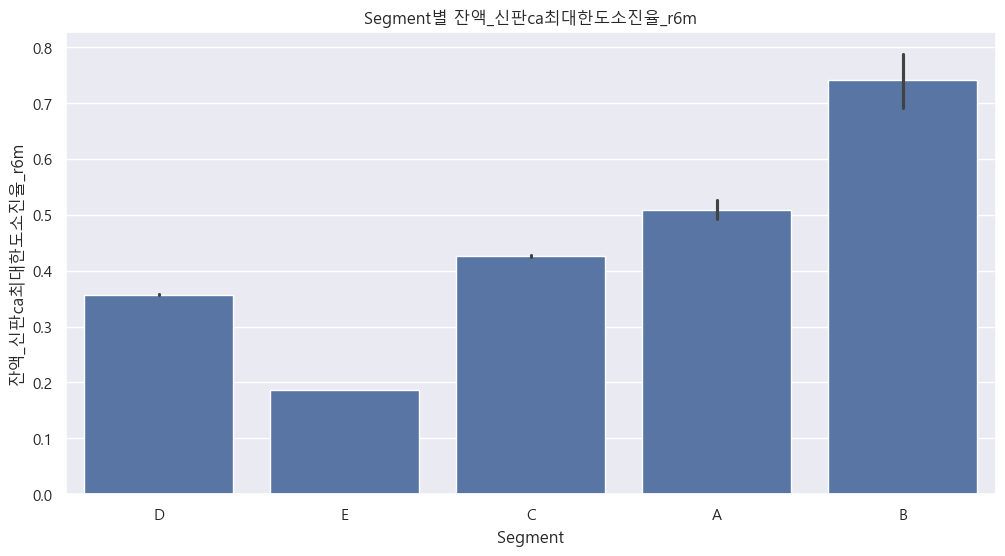

In [34]:
sns.barplot(data=performance_eda, x='Segment', y='잔액_신판ca최대한도소진율_r6m')
plt.title("Segment별 잔액_신판ca최대한도소진율_r6m")
plt.show()

In [17]:
performance_eda.nunique()

기준년월                        6
ID                     400000
증감율_이용건수_신용_전월        1495238
증감율_이용건수_신판_전월        1494161
증감율_이용건수_일시불_전월       1492523
증감율_이용건수_할부_전월          53150
증감율_이용건수_CA_전월           5640
증감율_이용건수_체크_전월         345015
증감율_이용건수_카드론_전월             2
증감율_이용금액_신용_전월        1537519
증감율_이용금액_신판_전월        1528634
증감율_이용금액_일시불_전월       1520366
증감율_이용금액_할부_전월         225847
증감율_이용금액_CA_전월          58261
증감율_이용금액_체크_전월         310073
증감율_이용금액_카드론_전월             2
증감율_이용건수_신용_분기        1667833
증감율_이용건수_신판_분기        1664831
증감율_이용건수_일시불_분기       1660447
증감율_이용건수_할부_분기         207117
증감율_이용건수_CA_분기          38875
증감율_이용건수_체크_분기         343537
증감율_이용건수_카드론_분기             3
증감율_이용금액_신용_분기        1748497
증감율_이용금액_신판_분기        1738475
증감율_이용금액_일시불_분기       1730381
증감율_이용금액_할부_분기         440915
증감율_이용금액_CA_분기         132815
증감율_이용금액_체크_분기         347857
증감율_이용금액_카드론_분기             3
잔액_신판평균한도소진율_r6m      1749566
잔액_신판최대한도소진율_r6m      1882511
잔액_신판평균한도소진율_r3m      1746667
잔액_신판최대한도소